In [1]:
from owslib.wms import WebMapService

## usage of open GIS data as webservice

The [INSPIRE](http://inspire.ec.europa.eu/) directive aims to create a European Union spatial data infrastructure for the purposes of EU environmental policies and policies or activities which may have an impact on the environment. The availability of GIS data as open data is one of the keystones of the INSPIRE directive. 

The publication of the open GIS data is done by individual institutes. They provide the data as a `WMS` web Service (a defined standard), which is then [used by geopunt](http://www.geopunt.be/catalogus/webservicefolder/0/07570002-1923-6fa2-fed3-d1ed-5de2-5970-e56c9325) and the EU administration. 

Hence, these existing [webservices of INBO](http://www.geopunt.be/catalogus/webservicefolder/0/07570002-1923-6fa2-fed3-d1ed-5de2-5970-e56c9325) and many other institutes can be called from Python as well...

## WMS: raster

In [2]:
wms = WebMapService('https://geoservices.informatievlaanderen.be/raadpleegdiensten/INBO/wms', version="1.3.0")

In [3]:
wms.identification.type

'WMS'

In [4]:
wms.identification.title

'WMS Instituut voor Natuur- en Bosonderzoek'

The available data sets from INBO:

In [5]:
list(wms.contents)

['BWK1Zone',
 'BWK2',
 'BWK2Hab3260',
 'BWK2Hab',
 'BWK2HabLabel',
 'BWK2Zone',
 'BWK2ZoneLabel',
 'BWK2Fauna',
 'HistoBos',
 'B1775',
 'B1850',
 'B1940',
 'BosLft',
 'PNVeg']

In [6]:
 wms['B1775'].title

'Bebossing op de Ferrariskaarten (1771-1778)'

In [7]:
wms['B1775'].queryable

1

In [8]:
wms['B1775'].boundingBox, wms['B1775'].boundingBoxWGS84

((2.52, 50.64, 5.94, 51.51), (2.52, 50.64, 5.94, 51.51))

In [9]:
wms['B1775'].crsOptions

['EPSG:25831',
 'EPSG:3812',
 'EPSG:4258',
 'EPSG:32631',
 'CRS:84',
 'EPSG:3857',
 'EPSG:3043',
 'EPSG:4326',
 'EPSG:102100',
 'EPSG:31370']

In [10]:
wms['B1775'].styles

{'default': {'legend': 'https://geoservices.informatievlaanderen.be/raadpleegdiensten/INBO/wms?request=GetLegendGraphic%26version=1.3.0%26format=image/png%26layer=B1775',
  'legend_format': 'image/png',
  'legend_height': '39',
  'legend_width': '175',
  'title': 'B1775'}}

What can we do with these data sets?

In [11]:
[op.name for op in wms.operations]

['GetCapabilities', 'GetMap', 'GetFeatureInfo']

The `getMap` provides the optios to download the data:

In [12]:
 wms.getOperationByName('GetMap').methods

[{'type': 'Get',
  'url': 'https://geoservices.informatievlaanderen.be/raadpleegdiensten/INBO/wms'}]

In [13]:
wms.getOperationByName('GetMap').formatOptions

['image/bmp',
 'image/jpeg',
 'image/tiff',
 'image/png',
 'image/png8',
 'image/png24',
 'image/png32',
 'image/gif',
 'image/svg+xml']

In practice, the downloading of the **Bebossing op de Ferrariskaarten (1771-1778)** (`B1775`):

In [14]:
img = wms.getmap(layers=['B1775'],
                 srs='EPSG:3857',
                 bbox=(324769.6462582653, 6630314.919341188, 466942.5188685014, 6653475.338911565),
                 size=(1860, 303),
                 format='image/tiff')
img

The transformation of the `img` object to a real image, can be done as follows:

In [15]:
with open('histobos.tiff', 'wb') as out:
    out.write(img.read())

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [17]:
img=mpimg.imread('histobos.tiff')

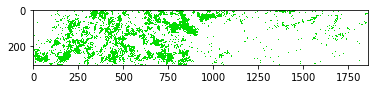

In [18]:
plt.imshow(img) # NOT georeferenced...

**Remark:**

Actually, the easiest way of checking the required information to download the data, is to use your browser (use CHROME!) and how the Geopunt website actually uses these webservices.  Find the [dataset on Geopunt](http://www.geopunt.be/kaart?type=dataset&data=%5B%7B%27type%27%3A%27WMS%27%2C%27url%27%3A%27https%3A%2F%2Fgeoservices.informatievlaanderen.be%2Fraadpleegdiensten%2Finbo%2Fwms%3Frequest%3DGetMap%26version%3D1.3.0%26service%3Dwms%27%2C%27layers%27%3A%5B%7B%27id%27%3A%27BWK1Zone%27%2C%27title%27%3A%27BWK%201%20-%20Zones%27%7D%5D%7D%5D)...

press `F12` and an additional menu will appear. Go to `Network` > `img` and the queries will appear. You can copy paste them:

https://geoservices.informatievlaanderen.be/raadpleegdiensten/INBO/wms?SERVICE=WMS&REQUEST=GetMap&FORMAT=image/png&TRANSPARENT=TRUE&STYLES=default&VERSION=1.3.0&LAYERS=B1775&WIDTH=1860&HEIGHT=303&CRS=EPSG:3857&BBOX=176023.18921534996,6602186.092932242,744714.679656789,6694827.771213831

Hence, the code above is actually doing the same as the execution of this URL. As it is actually an URL, you can also paste it into your browser as any other kind of website...

cdfr. also https://geoservices.informatievlaanderen.be/raadpleegdiensten/VMM/wms?SERVICE=WMS&REQUEST=GetMap&FORMAT=image/png&TRANSPARENT=TRUE&STYLES=default&VERSION=1.3.0&LAYERS=EcTpWlTyp&WIDTH=1860&HEIGHT=303&CRS=EPSG:3857&BBOX=385613.52077308996,6583573.676544732,669959.2659940548,6629894.515685567

## WFS: vector

**Example**:

[Voorlopig referentiebestand gemeentegrenzen](http://www.geopunt.be/catalogus/webservicefolder/1/11c37274-f9db-526e-2067-6606-b324-23d1-f285dbe7)

Extract some information in order to find specifically what I'm looking for:

In [118]:
from owslib.wfs import WebFeatureService
wfs = WebFeatureService(url='https://geoservices.informatievlaanderen.be/overdrachtdiensten/VRBG/wfs', version='1.1.0')

In [80]:
wfs.identification.title

'WFS Voorlopig referentiebestand gemeentegrenzen'

In [81]:
[operation.name for operation in wfs.operations]

['GetCapabilities', 'DescribeFeatureType', 'GetFeature', 'GetGmlObject']

In [82]:
from osgeo import ogr, osr, gdal

In [83]:
wfs_drv = ogr.GetDriverByName('WFS')

In [84]:
url = 'https://geoservices.informatievlaanderen.be/overdrachtdiensten/VRBG/wfs'
wfs_ds = wfs_drv.Open('WFS:' + url)

In [85]:
for i in range(wfs_ds.GetLayerCount()):
    layer = wfs_ds.GetLayerByIndex(i)
    srs = layer.GetSpatialRef()
    print('Layer: %s, Features: %s, SR: %s...' % (layer.GetName(), layer.GetFeatureCount(), srs.ExportToWkt()[0:50]))

Layer: VRBG:Refgew, Features: 1, SR: PROJCS["Belge 1972 / Belgian Lambert 72",GEOGCS["B...
Layer: VRBG:Refprv, Features: 5, SR: PROJCS["Belge 1972 / Belgian Lambert 72",GEOGCS["B...
Layer: VRBG:Refarr, Features: 22, SR: PROJCS["Belge 1972 / Belgian Lambert 72",GEOGCS["B...
Layer: VRBG:Refgem, Features: 308, SR: PROJCS["Belge 1972 / Belgian Lambert 72",GEOGCS["B...
Layer: VRBG:Grensinfo, Features: 10000, SR: PROJCS["Belge 1972 / Belgian Lambert 72",GEOGCS["B...


In [99]:
gmeente_layer = wfs_ds.GetLayerByName("VRBG:Refgem")

In [100]:
feat = gmeente_layer.GetNextFeature()

In [105]:
feat.items()

{'DATPUBLBS': '1976-01-20T23:00:00Z',
 'NAAM': 'Sint-Katelijne-Waver',
 'NISCODE': '12035',
 'NUMAC': '1975123003',
 'OIDN': 2.0,
 'TERRID': 169,
 'UIDN': 310.0,
 'gml_id': 'Refgem.2'}

In [98]:
# iterate over features
feat = gmeente_layer.GetNextFeature()
while feat is not None:
    feat = layer.GetNextFeature()
    # do something more..
    feat.

In [86]:
layer = wfs_ds.GetLayerByName("VRBG:Refprv")
layer

<osgeo.ogr.Layer; proxy of <Swig Object of type 'OGRLayerShadow *' at 0x7fe7b5eaf450> >

In [87]:
layer.GetFeatureCount()

5

I do want the province information, and I do prefer `geojson` as a data type...

I like GDAL from the command line: request the `Refprv` layer from the WFS and saving it as a `geojson`:

In [88]:
!ogr2ogr -f 'Geojson' provinces.geojson WFS:"https://geoservices.informatievlaanderen.be/overdrachtdiensten/VRBG/wfs" Refprv

In [89]:
import geopandas as gpd

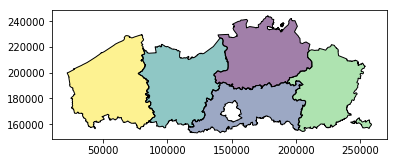

In [92]:
provinces = gpd.read_file("provinces.geojson")
provinces.plot()

In [96]:
provinces.head()

,NAAM,NISCODE,NUTS2,OIDN,TERRID,UIDN,geometry,gml_id
0,Antwerpen,10000,BE21,2.0,357,6.0,"(POLYGON ((178133.91 244025.6, 178125.41 24402...",Refprv.1
1,Vlaams Brabant,20001,BE24,4.0,359,7.0,"(POLYGON ((200484.928 193540.963625, 200484.79...",Refprv.2
2,Oost-Vlaanderen,40000,BE23,5.0,356,9.0,"(POLYGON ((142473.938 226522.156, 142360.719 2...",Refprv.3
3,Limburg,70000,BE22,1.0,355,10.0,"(POLYGON ((231635.609 218998.547, 231477.484 2...",Refprv.4
4,West-Vlaanderen,30000,BE25,3.0,351,11.0,"(POLYGON ((80189.158375 229275.081, 80038.5202...",Refprv.5


Actually, GDAL is even more powerfull, as we can directly **query the WFS data**:

In [111]:
!ogrinfo -ro WFS:"https://geoservices.informatievlaanderen.be/overdrachtdiensten/VRBG/wfs" Refprv -where "NAAM = 'Antwerpen'"

INFO: Open of `WFS:https://geoservices.informatievlaanderen.be/overdrachtdiensten/VRBG/wfs'
      using driver `WFS' successful.
Metadata:
  ABSTRACT=Directe downloadservice voor het Voorlopig referentiebestand gemeentegrenzen.
  PROVIDER_NAME=AIV
  TITLE=WFS Voorlopig referentiebestand gemeentegrenzen

Layer name: VRBG:Refprv
Metadata:
  ABSTRACT=Een provincie is een administratieve indeling van het Vlaams Gewest. Provincies vormen het bestuurlijke niveau tussen de gemeenten en arrondissementen enerzijds en het Vlaams Gewest anderzijds.
  KEYWORD_1=administratieve eenheid
  KEYWORD_10=provinciegrens
  KEYWORD_11=administratieve grens
  KEYWORD_12=territorium
  KEYWORD_13=gewestgrens
  KEYWORD_14=gemeenteterritorium
  KEYWORD_15=arrondissementsgrens
  KEYWORD_16=provinciegrens
  KEYWORD_17=gewestgrens
  KEYWORD_18=voorlopig referentiebestand bestuurlijke indelingen
  KEYWORD_19=administratieve indeling
  KEYWORD_2=bestuurlijke indeling
  KEYWORD_3=gemeente
  KEYWORD_4=gemeentegrens
  K

  MULTISURFACE (((178133.91 244025.6,178125.41 244027.08,178122.8835 244026.287875,177968.08575 243977.756375,177923.1385 243963.66475,177921.05 243963.01,177899.51 243956.23,177883.63 243950.83,177870.26 243946.53,177854.43 243941.62,177839.83 243936.19,177822.05 243930.43,177796.55 243922.8,177757.85 243909.74,177711.72 243894.52,177699.94 243890.45,177632.042625 243868.738,177631.83 243868.67,177624.24 243866.4,177619.7 243862.66,177575.0 243849.25,177533.03 243835.77,177526.88 243832.11,177514.59 243828.57,177514.08175 243828.406375,177446.66 243806.71,177373.57 243783.23,177366.17125 243780.826375,177353.359875 243776.664375,177353.1 243776.58,177316.89 243764.98,177279.48 243752.54,177242.8 243740.39,177242.527625 243740.303125,177206.76 243728.89,177180.68 243720.34,177170.37 243717.3,177163.27 243713.81,177125.46 243641.74,177120.3945 243631.402875,177104.82 243599.62,177085.25 243558.32,177076.05 243538.21,177072.5 243527.18,177058.13 243470.83,177054.085625 243469.18975,17704

52.5,199503.549125 240053.77525,199499.38275 240064.382875,199498.19 240067.42,199480.73 240111.77,199480.23675 240113.023875,199421.7 240261.86,199421.6785 240261.914875,199418.74875 240269.38025,199418.58 240269.81,199370.92975 240391.823125,199370.06 240394.05,199383.766 240415.891,199381.734 240427.563,199369.422 240440.938,199365.703 240446.406,199352.969 240451.344,199343.578 240445.375,199337.938 240445.047,199333.406 240448.875,199325.266 240444.797,199320.422 240426.813,199311.516 240432.203,199296.859 240446.578,199293.328 240443.281,199278.391 240443.75,199251.781 240440.594,199240.156 240438.813,199217.156 240436.156,199192.672 240434.656,199152.906 240431.953,199115.828 240429.219,199068.125 240420.953,198984.453 240410.75,198887.516 240401.063,198873.516 240403.781,198755.828 240392.625,198543.344 240399.719,198493.547 240401.109,198384.938 240398.906,198268.031 240398.734,198144.609 240397.109,197913.891 240394.688,197654.391 240393.547,197406.906 240391.891,197257.875 2

In [112]:
!ogr2ogr -f 'Geojson' antwerp_prov.geojson WFS:"https://geoservices.informatievlaanderen.be/overdrachtdiensten/VRBG/wfs" Refprv -where "NAAM = 'Antwerpen'"

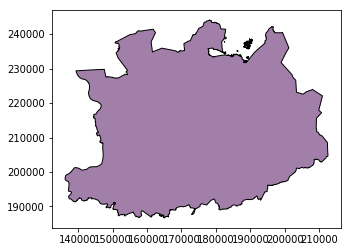

In [113]:
antwerp = gpd.read_file("antwerp_prov.geojson")
antwerp.plot()

#### **Example** MeetplOppervlwaterkwal

https://geoservices.informatievlaanderen.be/overdrachtdiensten/MeetplOppervlwaterkwal/wfs

In [141]:
url = 'https://geoservices.informatievlaanderen.be/overdrachtdiensten/MeetplOppervlwaterkwal/wfs'
wfs_ds2 = wfs_drv2.Open('WFS:' + url)

In [142]:
for i in range(wfs_ds2.GetLayerCount()):
    layer = wfs_ds2.GetLayerByIndex(i)
    srs = layer.GetSpatialRef()
    print('Layer: %s, Features: %s, SR: %s...' % (layer.GetName(), layer.GetFeatureCount(), srs.ExportToWkt()[0:50]))

Layer: MeetplOppervlwaterkwal:Mtploppw, Features: 6986, SR: PROJCS["Belge 1972 / Belgian Lambert 72",GEOGCS["B...


In [143]:
meet_oppwater= wfs_ds.GetLayerByName("MeetplOppervlwaterkwal:Mtploppw")
meet_oppwater.GetNextFeature().items()

{'BACTERIO': 0,
 'FYSICOCHEM': 1,
 'FYTOBENT': 0,
 'FYTOPLANKT': 0,
 'MACROFYT': 0,
 'MACROINV': 1,
 'MAP_MEETNT': 0,
 'MEETPLNR': '129300',
 'OIDN': 36.0,
 'OMSCHR': 'Reppel,Reppelerweg',
 'UIDN': 36.0,
 'WATBODEM': 1,
 'ZUURSTOF': 1,
 'gml_id': 'Mtploppw.4'}

In [144]:
!ogr2ogr -f 'Geojson' metingen_fytoplankton.geojson WFS:"https://geoservices.informatievlaanderen.be/overdrachtdiensten/MeetplOppervlwaterkwal/wfs" Mtploppw -where "FYTOPLANKT = '1'"

In [149]:
import mplleaflet

In [151]:
fyto = gpd.read_file("metingen_fytoplankton.geojson")
fyto.head()

,BACTERIO,FYSICOCHEM,FYTOBENT,FYTOPLANKT,MACROFYT,MACROINV,MAP_MEETNT,MEETPLNR,OIDN,OMSCHR,UIDN,WATBODEM,ZUURSTOF,geometry,gml_id
0,0,1,0,1,0,1,0,335000,160.0,"Gewad, opw brugje, thv Club Vrije Vissers",160.0,0,1,POINT (198585 204048),Mtploppw.120
1,0,1,0,1,0,1,1,336000,177.0,"Schoor; thv spoorweg (zandweg langs spoorweg),...",177.0,1,1,POINT (207151 205751),Mtploppw.137
2,1,1,0,1,0,1,0,340500,183.0,"RV: Battenbroek; Walem, ter hoogte van Blaren...",183.0,1,1,POINT (155148 195239),Mtploppw.143
3,0,1,0,1,0,1,1,969012,2622.0,"Reninge, Steenw Op Reninge-Noordschote",2622.0,0,1,POINT (39450 183350),Mtploppw.511
4,0,1,0,1,0,1,0,973075,2665.0,"Westouter, Langedreef zijweg",2665.0,0,1,POINT (35218 165357),Mtploppw.553


In [153]:
fyto.crs

{'init': 'epsg:31370'}

In [158]:
fyto.to_crs('+init=epsg:4326').plot(markersize=5)
mplleaflet.display()

check also [this tutorial](http://www.paolocorti.net/2011/03/23/a-quick-look-at-the-wfs-gdal-driver/)...